# Intro
The World Happiness Report is a landmark survey of the state of global happiness, which ranks countries around the world by their happiness levels. The first report came out in 2013, and continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations.

Apart from the happiness score, the report also includes scores of other 6 factors - economic production, social support, life expectancy, freedom, absence of corruption, and generosity, which describe the extent to which these factors contribute in evaluating the happiness in each country.

# Goal
This project focuses on the latest 2019 report and looks into the level of happiness across different regions. The goal is 1. to find out whether happness level differs significantly from region to region; 2. if that's the case, to identify the top factors that contribute to such regional gaps. The main purpose of this analysis is to reveal the major factors that influence people's happiness levels, which can provide some insights for future policy making and actions.

# Steps
1. Check and clean data
2. Compare happiness levels by regions - ANOVA (continent ~ happiness scores)
3. Review top factors of each continent 

## Data check & cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
report_19 = pd.read_csv('/Users/vera/vscode/World_Happiness_Report_Project/Happiness_data/world_happiness_report/2019.csv')
report_16 = pd.read_csv('/Users/vera/vscode/World_Happiness_Report_Project/Happiness_data/world_happiness_report/2016.csv')

report_19.head()
report_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [3]:
report_16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


As there's no "Region" information in the 2019 report, we need to use the 2016 "Region" data and merge it into the 2019 table.

In [4]:
# Rename the column & trim data for join
report_19 = report_19.rename(columns={'Country or region': 'Country'})

regions = report_16[['Country', 'Region']]

# Join 2 tables on "Country"
report = pd.merge(report_19, regions, how = 'left', on = 'Country')
report.info()
report[report['Region'].isnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Region                        148 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 13.4+ KB


,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,NaN
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162,NaN
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034,NaN
119,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,NaN
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138,NaN
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,NaN
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,NaN
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,NaN


In [5]:
# Mannually fill in the null value
leftout_country = {'Trinidad & Tobago': 'Latin America and Caribbean', 'Northern Cyprus' : 'Central and Eastern Europe', 'North Macedonia' : 'Central and Eastern Europe',
                   'Gambia' : 'Sub-Saharan Africa', 'Mozambique' : 'Sub-Saharan Africa', 'Swaziland' : 'Sub-Saharan Africa', 'Lesotho' : 'Sub-Saharan Africa', 
                   'Central African Republic' : 'Sub-Saharan Africa'}
for country in leftout_country:
    report.loc[report['Country'] == country, 'Region'] = leftout_country[country]

print(report.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country                       156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Region                        156 non-null    object 
dtypes: float64(7), int64(1), object(2)
memory usage: 13.4+ KB
None


In [6]:
# Check how many regions there are and each contains how many countries
region_count = report[['Region','Country']].groupby('Region').count()
print(region_count.sort_values(by='Country'))

                                 Country
Region                                  
Australia and New Zealand              2
North America                          2
Eastern Asia                           6
Southern Asia                          7
Southeastern Asia                      9
Middle East and Northern Africa       19
Western Europe                        20
Latin America and Caribbean           21
Central and Eastern Europe            30
Sub-Saharan Africa                    40


Some regions contain only a small number of countries. We'll combine these regions to make groups with sufficient samples.

Based on regional approximity and scoial and cultural similarity, the new combined regions are as follows: Eastern Asia, Southeastern Asia and Southern Asia are combined into Asia; Australia and New Zealand, North America and Western Europe are combined into Westen World.

In [7]:
# Combine regions
combinations = {'Eastern Asia':'Asia', 'Southeastern Asia' : 'Asia', 'Southern Asia' : 'Asia', 
                'Australia and New Zealand' : 'Western World', 'North America' : 'Western World', 'Western Europe' : 'Western World'}
for region in combinations:
    report.loc[report['Region'] == region, 'Region'] = combinations[region]

print(report['Region'].unique())

['Western World' 'Latin America and Caribbean'
 'Middle East and Northern Africa' 'Central and Eastern Europe' 'Asia'
 'Sub-Saharan Africa']


## Regional Comparison

Next let's compare the happiness scores of different regions to see whether there's any significant regional difference.

Let's start by checking the overall distrbution, regional means and percentiles.

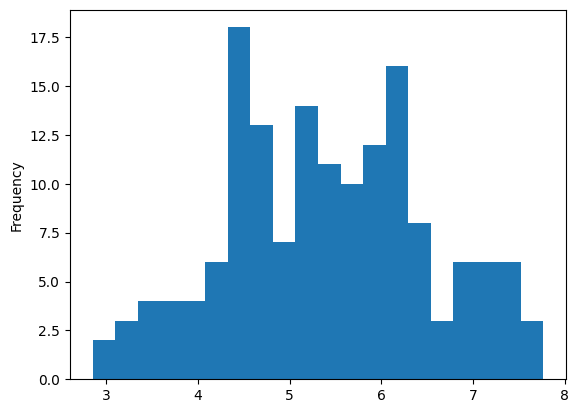

In [8]:
#Plot Happiness score distribution
report['Score'].plot.hist(bins = 20)
plt.show()

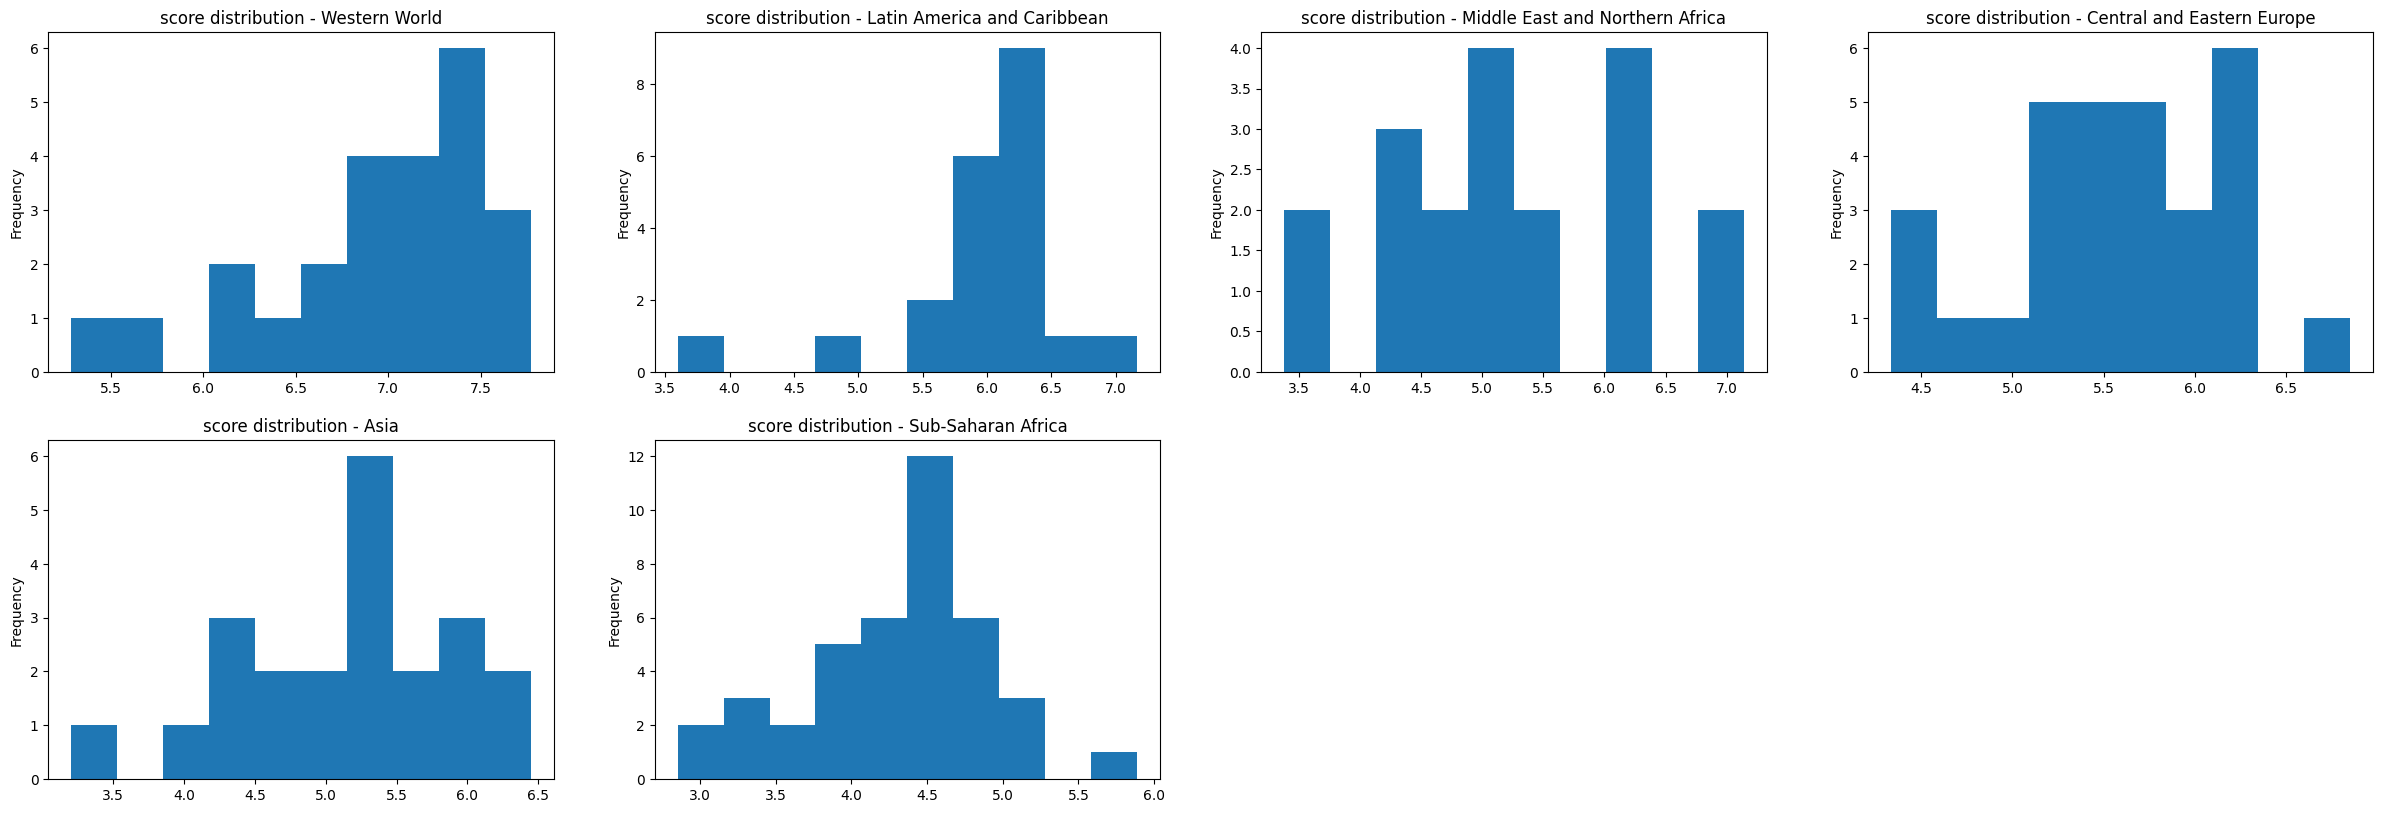

In [9]:
# Histogram by regions
unique_regions = report['Region'].unique()
fig = plt.figure(figsize=(30, 15))
i = 1
for region in unique_regions:
    ax = fig.add_subplot(3, 4, i)
    report[report['Region'] == region]['Score'].plot.hist()
    ax.set_title('score distribution - ' + region)
    ax.set
    i += 1
plt.show()

In [10]:
# Calculate regional means
regional_mean = report[['Score', 'Region']].groupby('Region').mean().reset_index()
regional_mean = regional_mean.sort_values(by='Score', ascending=False)
print(regional_mean)


                            Region     Score
5                    Western World  6.944708
2      Latin America and Caribbean  5.954429
1       Central and Eastern Europe  5.566733
3  Middle East and Northern Africa  5.237000
0                             Asia  5.149273
4               Sub-Saharan Africa  4.300050


In [11]:
# Calculate regional percentiles
regional_percentile = report[['Score', 'Region']].groupby('Region').quantile([.1, .5, .9])
regional_percentile.reset_index(inplace=True)

# check the new dataframe
print(regional_percentile.columns)

Index(['Region', 'level_1', 'Score'], dtype='object')


In [12]:
# rename columns and pivot the table to make it easier to view
regional_percentile.rename(columns={'level_1':'Percentile'}, inplace=True)
percentile_pivoted = regional_percentile.pivot(index='Region', columns='Percentile', values='Score')
percentile_pivoted = percentile_pivoted.sort_values(by=0.5, ascending=False)
print(percentile_pivoted)

Percentile                          0.1     0.5     0.9
Region                                                 
Western World                    6.0991  7.0720  7.5360
Latin America and Caribbean      5.4250  6.1050  6.4440
Central and Eastern Europe       4.7030  5.5660  6.1748
Middle East and Northern Africa  4.0252  5.2080  6.4650
Asia                             4.3606  5.1915  5.9967
Sub-Saharan Africa               3.4024  4.4040  4.9492


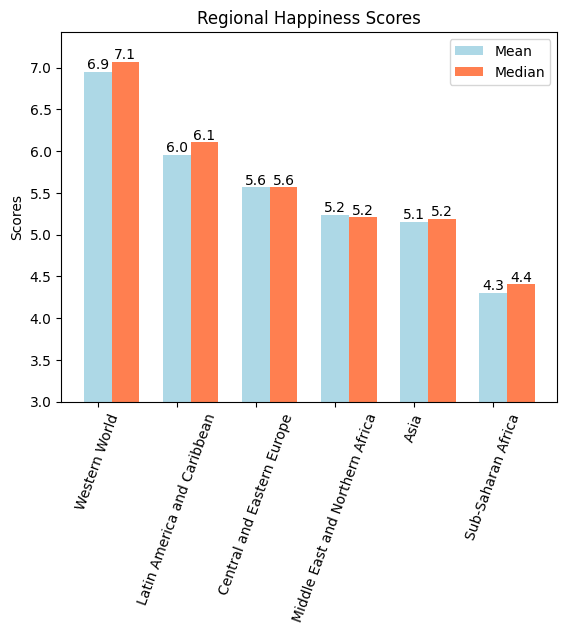

In [13]:
#plot mean & median scores by region

# First create a new dataframe containing both means and medians.
mm = pd.merge(regional_mean, regional_percentile[regional_percentile['Percentile'] == 0.5][['Region', 'Score']], how= 'left', on= 'Region')
mm.columns = ['Region', 'Mean', 'Median']

# Plot
x = np.arange(len(mm['Region']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
for i in x:
    mean = ax.bar(i, mm.loc[i, 'Mean'], width, color='lightblue')
    ax.bar_label(mean, labels=[round(mm.loc[i, 'Mean'], 1)])
    median = ax.bar(i+width, mm.loc[i, 'Median'], width, color='coral')
    ax.bar_label(median, labels=[round(mm.loc[i, 'Median'], 1)])

# Add some text for labels, title and custom x-axis tick labels, etc.
labels = mm['Region']
ax.set_ylabel('Scores')
ax.set_title('Regional Happiness Scores')
#ax.set_xticklabels(labels, rotation=45)
ax.set_xticks(x, labels, rotation=70)
ax.legend(['Mean', 'Median'], loc='upper right')
ax.set_ylim(3,)


plt.show()



Regional means and medians gives consistent ranking. The Western World is ranked first, followed by Latin America and Caribbean and Central and Eastern Europe. Sub-Saharan Africa region is the least happy region according to the report.

But is the regional difference statistically significant? That is to say, does the score difference among the regions, for example, between Middle East and Northern Africa and Asia, truly represent a gap in the degree of happiness in the 2 regions? Or is the numeric difference only due to chance (given the difference is considerably small)? To answer this question, we can use an ANOVA test to find out.

### Hypothesis Testing
- **H0:** All regions have the same happiness mean score.
- **H1:** At least 1 region differs from others in its happiness mean score.

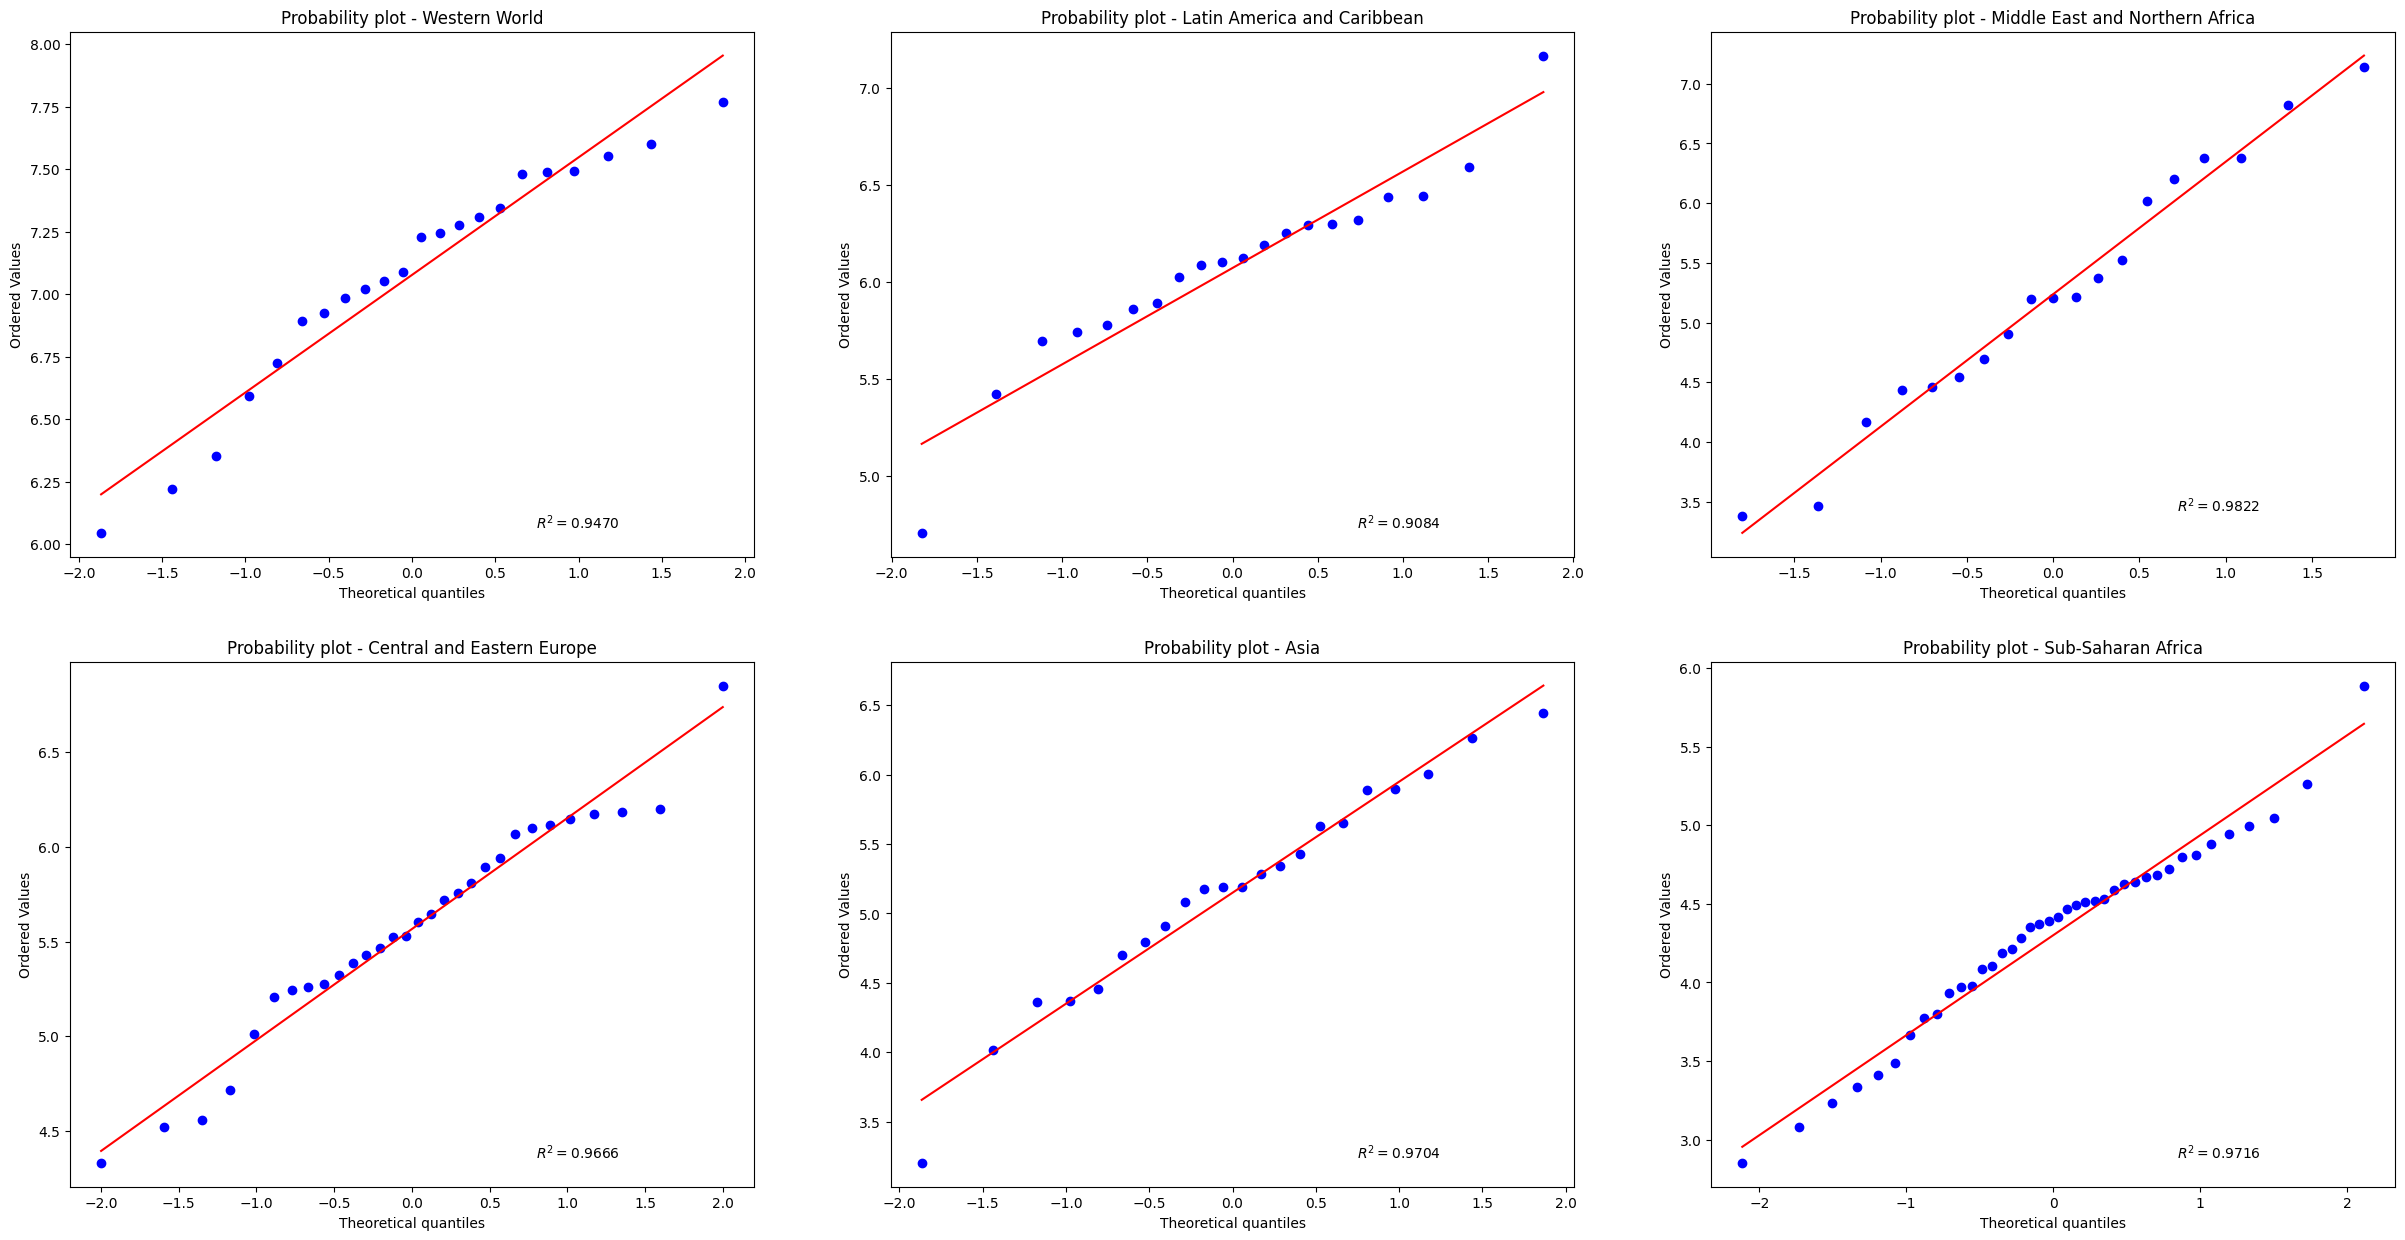

In [28]:
# Before conducting ANOVA, we need to check whether the assumptions are met - normality, and homogeneity of variance.
# The above histograms have shown the the happiness scores are roughly normally distributed. We can use QQ plot to further test it.
fig = plt.figure(figsize=(30, 15))
i = 1
for region in unique_regions:
    ax = fig.add_subplot(2, 3, i)
    stats.probplot(report[report['Region'] == region]['Score'], plot=plt, rvalue=True)
    ax.set_title('Probability plot - ' + region)
    ax.set
    i += 1
plt.show()

All the other regions follow normal distribution except the Western World region and the Latin America and Caribbean region, both of with are left skewed (clearly shown in the histograms). We can adjust both groups by removing the bottom outliners from each group.

In [16]:
# Locate outliners in Western World
report[report['Region'] == 'Western World'].sort_values(by='Score')

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034,Western World
65,66,Portugal,5.693,1.221,1.431,0.999,0.508,0.047,0.025,Western World
48,49,Cyprus,6.046,1.263,1.223,1.042,0.406,0.190,0.041,Western World
35,36,Italy,6.223,1.294,1.488,1.039,0.231,0.158,0.030,Western World
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079,Western World
23,24,France,6.592,1.324,1.472,1.045,0.436,0.111,0.183,Western World
21,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151,Western World
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,Western World
17,18,Belgium,6.923,1.356,1.504,0.986,0.473,0.160,0.210,Western World
16,17,Germany,6.985,1.373,1.454,0.987,0.495,0.261,0.265,Western World


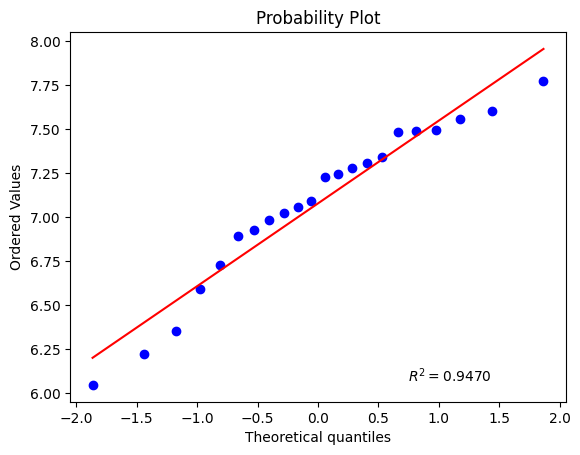

In [17]:
# Remove the top 2 outliners with the lowest scores.
report.drop([81, 65], inplace=True)
stats.probplot(report[report['Region'] == 'Western World']['Score'], plot=plt, rvalue=True)
plt.show()
# stats.shapiro(report[report['Region'] == 'Western World']['Score'])

In [18]:
# Locate outliners in Latin America and Caribbean
report[report['Region'] == 'Latin America and Caribbean'].sort_values(by='Score')

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,Latin America and Caribbean
107,108,Venezuela,4.707,0.960,1.427,0.805,0.154,0.064,0.047,Latin America and Caribbean
76,77,Dominican Republic,5.425,1.015,1.401,0.779,0.497,0.113,0.101,Latin America and Caribbean
64,65,Peru,5.697,0.960,1.274,0.854,0.455,0.083,0.027,Latin America and Caribbean
62,63,Paraguay,5.743,0.855,1.475,0.777,0.514,0.184,0.080,Latin America and Caribbean
60,61,Bolivia,5.779,0.776,1.209,0.706,0.511,0.137,0.064,Latin America and Caribbean
58,59,Honduras,5.860,0.642,1.236,0.828,0.507,0.246,0.078,Latin America and Caribbean
55,56,Jamaica,5.890,0.831,1.478,0.831,0.490,0.107,0.028,Latin America and Caribbean
49,50,Ecuador,6.028,0.912,1.312,0.868,0.498,0.126,0.087,Latin America and Caribbean
46,47,Argentina,6.086,1.092,1.432,0.881,0.471,0.066,0.050,Latin America and Caribbean


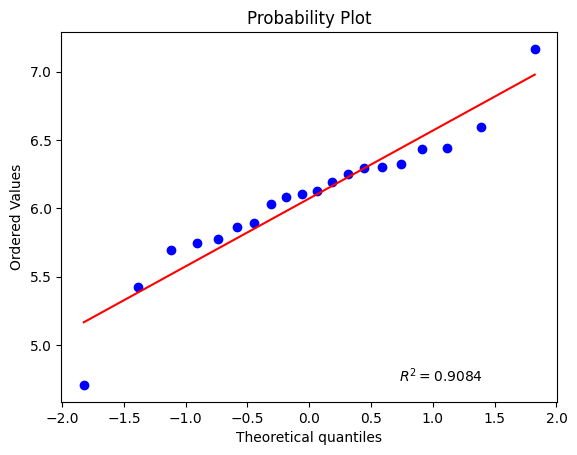

In [19]:
# Remove the top 1 outliner with the lowest score.
report.drop([146], inplace=True)
stats.probplot(report[report['Region'] == 'Latin America and Caribbean']['Score'], plot=plt, rvalue=True)
plt.show()
# stats.shapiro(report[report['Region'] == 'Latin America and Caribbean']['Score'])

In [20]:
# Test homogeneity of variance
stats.levene(report[report['Region'] == 'Western World']['Score'],
             report[report['Region'] == 'Latin America and Caribbean']['Score'],
             report[report['Region'] == 'Central and Eastern Europe']['Score'],
             report[report['Region'] == 'Middle East and Northern Africa']['Score'],
             report[report['Region'] == 'Asia']['Score'],
             report[report['Region'] == 'Sub-Saharan Africa']['Score'])

LeveneResult(statistic=3.615722903840063, pvalue=0.004097394086515341)

The p value is 0.004 < 0.05 which suggests there's no homogeneity of variance among the groups. Therefore, we'll conduct Welch's test instead.

In [21]:
import pingouin as pg

pg.welch_anova(dv='Score', between='Region', data=report)

,Source,ddof1,ddof2,F,p-unc,np2
0,Region,5,61.487674,81.501316,8.274524e-26,0.64654


The very small p value shows the difference in regional mean scores is significant. Next we'll run post hoc test to make pair-wise comparisons.

In [22]:
pairs = pg.pairwise_gameshowell(data=report, dv='Score', between='Region', effsize='cohen')
print(pairs)

                                  A                                B  \
0                              Asia       Central and Eastern Europe   
1                              Asia      Latin America and Caribbean   
2                              Asia  Middle East and Northern Africa   
3                              Asia               Sub-Saharan Africa   
4                              Asia                    Western World   
5        Central and Eastern Europe      Latin America and Caribbean   
6        Central and Eastern Europe  Middle East and Northern Africa   
7        Central and Eastern Europe               Sub-Saharan Africa   
8        Central and Eastern Europe                    Western World   
9       Latin America and Caribbean  Middle East and Northern Africa   
10      Latin America and Caribbean               Sub-Saharan Africa   
11      Latin America and Caribbean                    Western World   
12  Middle East and Northern Africa               Sub-Saharan Af

In [23]:
# Choose the pairs with p value < 0.05 (insignificant pairs)
pairs[pairs['pval'] < 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,cohen
1,Asia,Latin America and Caribbean,5.149273,6.072300,-0.923027,0.198567,-4.648431,36.089653,5.815329e-04,-1.407116
3,Asia,Sub-Saharan Africa,5.149273,4.300050,0.849223,0.192228,4.417779,36.285553,1.135059e-03,1.247610
4,Asia,Western World,5.149273,7.076955,-1.927682,0.191836,-10.048593,34.209402,1.415963e-10,-3.029765
5,Central and Eastern Europe,Latin America and Caribbean,5.566733,6.072300,-0.505567,0.152393,-3.317527,44.761284,2.097138e-02,-0.929408
7,Central and Eastern Europe,Sub-Saharan Africa,5.566733,4.300050,1.266683,0.144036,8.794242,65.194835,1.665423e-11,2.097867
8,Central and Eastern Europe,Western World,5.566733,7.076955,-1.510221,0.143511,-10.523356,49.549339,4.811707e-13,-2.854731
9,Latin America and Caribbean,Middle East and Northern Africa,6.072300,5.237000,0.835300,0.267246,3.125588,25.199646,4.523588e-02,1.018406
10,Latin America and Caribbean,Sub-Saharan Africa,6.072300,4.300050,1.772250,0.148384,11.943673,46.872987,4.996004e-15,3.025935
11,Latin America and Caribbean,Western World,6.072300,7.076955,-1.004655,0.147875,-6.793933,38.871410,6.061599e-07,-2.106525
12,Middle East and Northern Africa,Sub-Saharan Africa,5.237000,4.300050,0.936950,0.262570,3.568382,24.131209,1.710897e-02,1.187600


It seems most of the regional pairs have significant differences. Let's also check the insignificant pairs. Some pairs have considerably high cohen's D, which suggests a hugh regional gap.

In [24]:
# Choose the pairs with p value > 0.05 (insignificant pairs)
pairs[pairs['pval'] > 0.05]

,A,B,mean(A),mean(B),diff,se,T,df,pval,cohen
0,Asia,Central and Eastern Europe,5.149273,5.566733,-0.417461,0.195339,-2.137104,37.013515,0.291330,-0.627821
2,Asia,Middle East and Northern Africa,5.149273,5.237000,-0.087727,0.293861,-0.298533,32.463545,0.999649,-0.095667
6,Central and Eastern Europe,Middle East and Northern Africa,5.566733,5.237000,0.329733,0.264856,1.244953,24.768027,0.810704,0.414195


The 3 regions: Asia, Central and Eastern Europe, Middle East and Northern Africa, don't have significant results in the post hoc test, which means statistically speaking, all the 3 have the same mean score. If we take a look at their actuall means, 5.149 for Asia, 5.567 for Central and Eastern Europe and 5.237 for Middle East and Northern Africa, the scores are indeed very close.

In conclusion, different regions do vary in their levels of happiness. The Western World (Australia and New Zealand, North America and Western Europe) has the highest happiness score, leading by a big margin over the 2nd ranking region Latin America and Caribbean. Asia, Central and Eastern Europe, Middle East and Northern Africa have very close happiness scores and are statistically no different, so they together come in at the 3rd place, followed by Africa which is the least happy region. We can take a look at the previous bar plot to better visualize it:

![Look again at the score mean and median bar plot](/Users/vera/vscode/World_Happiness_Report_Project/score_mean.jpg) 

## Identify Top Factors

According the Kaggle descrption of the data set, the values of each factor already describe the extent to which these factors contribute in evaluating the happiness in each country. And the happiness score is the sum of all the factors of the country plus a residual (which is omitted from the 2019 report). Let first take a look at the overall summary statistics.

In [25]:
report.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,78.111111,5.417843,0.905085,1.211111,0.723471,0.396340,0.185425,0.111667
std,45.267561,1.114085,0.398071,0.298579,0.241433,0.138758,0.092421,0.095004
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000
25%,39.000000,4.548000,0.611000,1.056000,0.551000,0.311000,0.110000,0.050000
50%,78.000000,5.386000,0.960000,1.274000,0.789000,0.417000,0.178000,0.086000
75%,117.000000,6.192000,1.237000,1.454000,0.881000,0.507000,0.247000,0.142000
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


It appears that GDP per capita, social support and healthy life expectancy are the top contributor towards happiness. Let's see the whether things are different regional-wise.

In [35]:
# Calculate the means of medians of the 6 factors by region
factor_means = report.groupby('Region').mean().reset_index()
# factor_medians = report.groupby('Region').median().reset_index()
print('Means by region: \n', factor_means)
# print('Medianss by region: \n', factor_medians)

Means by region: 
                             Region  Overall rank     Score  GDP per capita  \
0                             Asia     89.363636  5.149273        0.924227   
1       Central and Eastern Europe     70.733333  5.566733        1.029133   
2      Latin America and Caribbean     46.600000  6.072300        0.954350   
3  Middle East and Northern Africa     84.894737  5.237000        1.059053   
4               Sub-Saharan Africa    124.800000  4.300050        0.443750   
5                    Western World     14.818182  7.076955        1.377818   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0        1.187591                 0.761227                      0.446864   
1        1.335900                 0.817267                      0.359500   
2        1.372300                 0.830000                      0.461650   
3        1.148684                 0.751053                      0.317947   
4        0.916675                 0.407550            

 GDP per capita, social support and healthy life expectancy seem to be the top 3 factors in each region as well, but the internal orders differ among regions. So let's compare.

In [36]:
from IPython.display import display

for row in factor_means.iterrows():
    region = pd.Series([row[1]['Region']], index=['Region'])
    n = row[1].drop(["Region", 'Score', 'Overall rank']).sort_values(ascending=False)
    ranked = region.append(n)
    display(ranked)

Region                              Asia
Social support                  1.187591
GDP per capita                  0.924227
Healthy life expectancy         0.761227
Freedom to make life choices    0.446864
Generosity                      0.245273
Perceptions of corruption       0.112864
dtype: object

Region                          Central and Eastern Europe
Social support                                      1.3359
GDP per capita                                    1.029133
Healthy life expectancy                           0.817267
Freedom to make life choices                        0.3595
Generosity                                        0.144333
Perceptions of corruption                           0.0651
dtype: object

Region                          Latin America and Caribbean
Social support                                       1.3723
GDP per capita                                      0.95435
Healthy life expectancy                                0.83
Freedom to make life choices                        0.46165
Generosity                                           0.1309
Perceptions of corruption                           0.07015
dtype: object

Region                          Middle East and Northern Africa
Social support                                         1.148684
GDP per capita                                         1.059053
Healthy life expectancy                                0.751053
Freedom to make life choices                           0.317947
Generosity                                             0.153474
Perceptions of corruption                                 0.105
dtype: object

Region                          Sub-Saharan Africa
Social support                            0.916675
GDP per capita                             0.44375
Healthy life expectancy                    0.40755
Freedom to make life choices               0.33735
Generosity                                0.187725
Perceptions of corruption                   0.0945
dtype: object

Region                          Western World
Social support                       1.507182
GDP per capita                       1.377818
Healthy life expectancy              1.011545
Freedom to make life choices         0.511636
Generosity                           0.254591
Perceptions of corruption            0.248682
dtype: object

Region,Sub-Saharan Africa,Middle East and Northern Africa,Asia,Central and Eastern Europe,Latin America and Caribbean,Western World
Social support,0.916675,1.148684,1.187591,1.335900,1.37230,1.507182
GDP per capita,0.443750,1.059053,0.924227,1.029133,0.95435,1.377818
Healthy life expectancy,0.407550,0.751053,0.761227,0.817267,0.83000,1.011545
Freedom to make life choices,0.337350,0.317947,0.446864,0.359500,0.46165,0.511636
Generosity,0.187725,0.153474,0.245273,0.144333,0.13090,0.254591
Perceptions of corruption,0.094500,0.105000,0.112864,0.065100,0.07015,0.248682


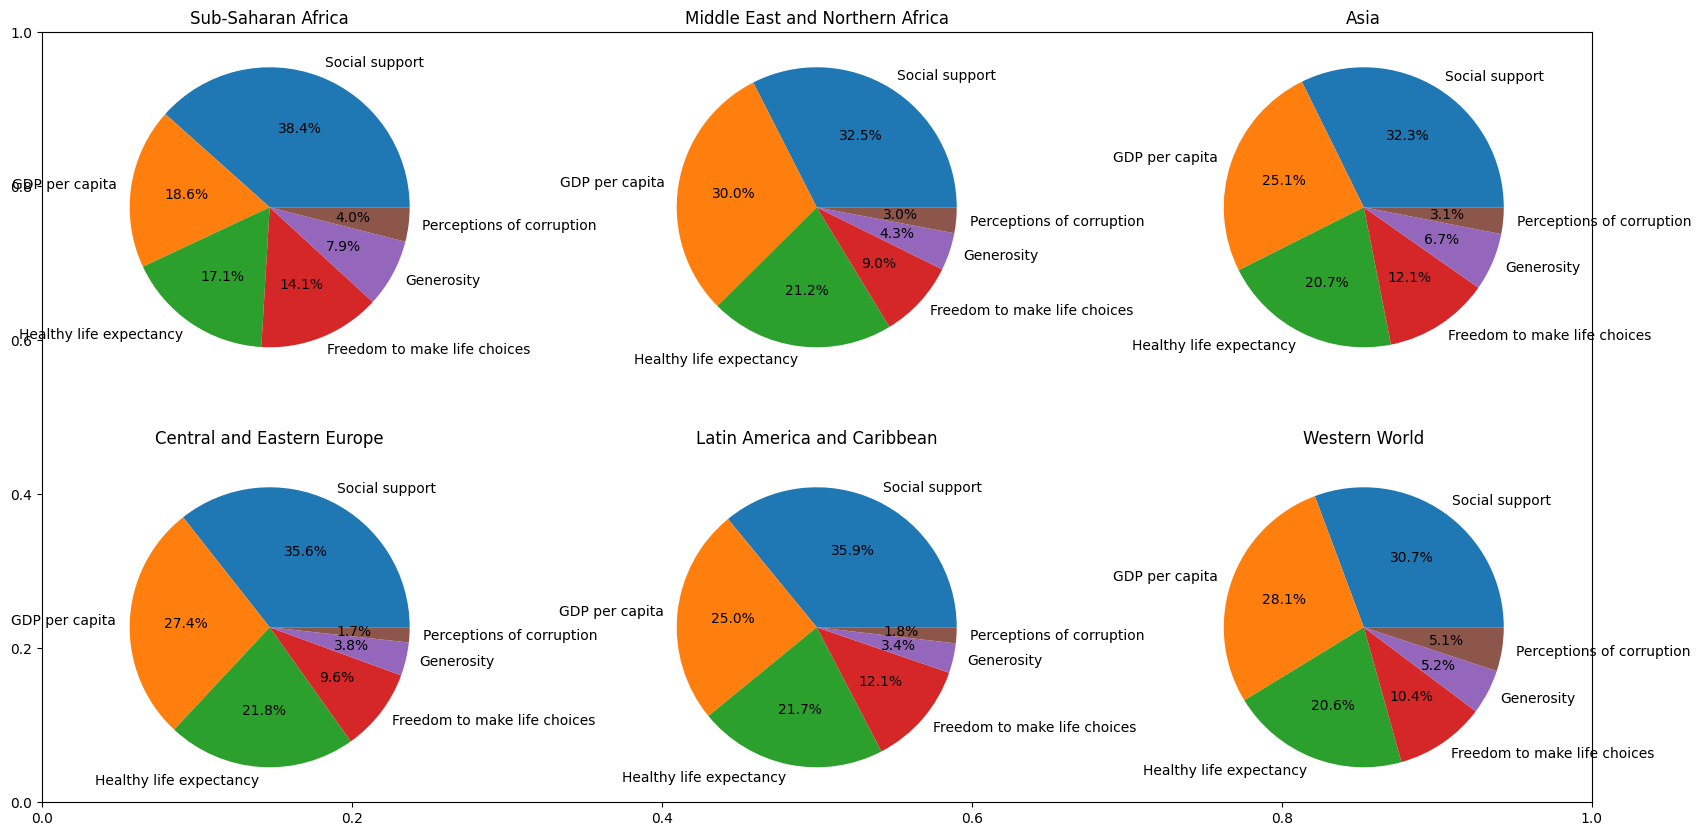

In [59]:
# Given all regions have the same factor ranking, we only need to transpose the factor_means and sort by any region to get the full regional factor ranks
factor_means.drop(columns=['Overall rank', 'Score'], inplace=True)
factor_T = factor_means.set_index('Region').T.sort_values(by='Asia', ascending=False).sort_values(by='Social support', axis=1)
display(factor_T)

#plot pie charts
regions = factor_T.columns
fig, ax = plt.subplots(figsize=(20, 10))
for i in range(len(regions)):
    ax = fig.add_subplot(2, 3, i+1)
    plt.pie(factor_T.iloc[:,i], labels=factor_T.index, autopct='%.1f%%')
    ax.set_title(regions[i])

Now we can tell the social support is the No.1 factor for happiness, followed by GDP per captita, Healthy life expectancy, Freedom to make life choices, generosity and lastly perceptions of corruption. And this ladder of factors are consistent across all regions. There could be 2 interpretations for this observation:

1. Social support has the biggest impact on happiness, not GDP (though it also matters), which might be surprising for some people. For example, Latin America and Caribbean has a higher happiness score over regions like Middle East and Northern Africa or Central and Eastern Europe. The latter actually have higher GDP scores, but their social support scores fall behind. So if the goal of the policy maker is to improve people's overall happiness, improvement of social support should be given the higest priority over economy.

2. As social support makes the highest contribution to the happiness score, it might indicate that some of the other aeras are less well developed, and their contribution is thus inadequate. For example, though Sub-Saharan Africa has the lowest score overall, its social support score isn't much lower than regions like Middle East and Northern Africa or Asia, only by around 0.2-0.3. In contrast, its GDP per capita is only 42% of Middle East and Northern Africa, 48% of Asia; and its healthy life expectancy around half of the 2 regions. It can also be seen from the pie cahrts that the GDP and life expectancy contribute below 20% to the happiness score, while in all the other regions the contribution is above 20%. So for Sub-Saharan Africa, given the unbalanced development in social support versus GDP and life expectancy, policy makers might want to prioritize economy and health care over social support in the short term to improve people's happiness level.